# Tesla, Inc. (formerly Tesla Motors, Inc.) Recurrent Neural Networks

### Stock price prediction

<br/> Monika Matilionytė KT-8/2
<br/> email: monika.ma8668@go.kauko.lt

### We start by importing Numpy, matplotlib, pandas libraries and assigning abbreviations to them.

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset
##### Dataset description: the open high, low and close values of the Google Stock from 2009 to 2019.

In [2]:
# Importing the dataset and loading the file contents

dataset_train = pd.read_csv('TESLA_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
# Createing a subtable of relevant entries (open values)

training_set = dataset_train.iloc[:, 1:2].values

In [5]:
training_set

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [226.919998],
       [227.089996],
       [232.899994]])

### Feature scaling
##### Importing the ScikitLearn library and usingMinMaxScaler() to rescale the data to the range from 0 to 1. 

In [6]:
# Feature Scaling

# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [7]:
# creating a scaler instance to rescale all data to the range of 0.0 to 1.0 
sc = MinMaxScaler(feature_range = (0, 1))

In [8]:
# creating the actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)

In [9]:
training_set_scaled

array([[0.00771826],
       [0.02604237],
       [0.02391041],
       ...,
       [0.56883011],
       [0.56928888],
       [0.58496827]])

### Splitting the training set to dependent and independent variables

In [10]:
# Creating a data structure with 90 timesteps and 1 output

# the 90 stock prices in the last 5 months before today
X_train = [] 

In [11]:
training_set_scaled.shape

(2287, 1)

In [12]:
# the stock price today
y_train = [] 

In [13]:
# we start from day 90 because that is the first instance allowing us to 
# go back 90 days 

for i in range(90, 2287): 
    # 0 is the column ID, the only column in this case.    
    # put the last 120 days values in one row of X_train
    X_train.append(training_set_scaled[i-90:i, 0]) 
    y_train.append(training_set_scaled[i, 0])


In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train

array([[0.00771826, 0.02604237, 0.02391041, ..., 0.01565241, 0.01495075,
        0.01387128],
       [0.02604237, 0.02391041, 0.01851302, ..., 0.01495075, 0.01387128,
        0.01743355],
       [0.02391041, 0.01851302, 0.01041695, ..., 0.01387128, 0.01743355,
        0.02355958],
       ...,
       [0.678343  , 0.68425314, 0.69210634, ..., 0.6492241 , 0.65586294,
        0.5865875 ],
       [0.68425314, 0.69210634, 0.69205232, ..., 0.65586294, 0.5865875 ,
        0.56883011],
       [0.69210634, 0.69205232, 0.65732017, ..., 0.5865875 , 0.56883011,
        0.56928888]])

### Reshaping the Matrix

In [16]:
# Reshaping the data matrix, we retain the 2 original dimensions and add a third of depth=1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN
##### Before we start to build the RNN, we need to import additional libraries 

In [17]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [18]:
# Initialising the RNN as a sequence of layers
regressor = Sequential()

### Adding the First Layer


In [19]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 90, return_sequences = True, input_shape =  (X_train.shape[1], 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# The argument is the dropout rate to ignore in the layers (20%), 
# 90 units * 20% = 18 units will be dropped each time
regressor.add(Dropout(0.2))

### Adding More Layers
##### We add more LSTM layers with Dropout regularization to make sure we avoid overfiting

In [20]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 90, return_sequences = True))
regressor.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 90, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 90))
regressor.add(Dropout(0.2))

### Adding Output Layer & Compiling


In [23]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [24]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fit the RNN to the Training set
##### We now want to train our RNN using the data 

In [25]:
# Fitting the RNN to the Training set 

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2197/2197 [==============================] - 37s 17ms/step - loss: 0.0179
Epoch 2/100
2197/2197 [==============================] - 34s 15ms/step - loss: 0.0045
Epoch 3/100
2197/2197 [==============================] - 36s 17ms/step - loss: 0.0040
Epoch 4/100
2197/2197 [==============================] - 35s 16ms/step - loss: 0.0043
Epoch 5/100
2197/2197 [==============================] - 35s 16ms/step - loss: 0.0034
Epoch 6/100
2197/2197 [==============================] - 32s 15ms/step - loss: 0.0038
Epoch 7/100
2197/2197 [==============================] - 33s 15ms/step - loss: 0.0035
Epoch 8/100
2197/2197 [==============================] - 34s 16ms/step - loss: 0.0032
Epoch 9/100
2197/2197 [==============================] - 34s 15ms/step - loss: 0.0031
Epoch 10/100
2197/2197 [==============================] - 31s 14ms/step - loss: 0.0029
Epoch 11/100
2197/2197 [==============================] - 31s 14ms/step - loss: 0.0025
Epoc

### Computing Predictions

Create a data-frame by importing the Google Stock Price Test set for July 2019 using pandas and make it a numpy array.

There are 20 financial days in one month, weekends are excluded!

In [26]:
# Getting the real stock price for July 31st 2009 - 
# July 31st 2019

dataset_test = pd.read_csv('TESLA_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-31,243.000000,246.679993,236.649994,241.610001,241.610001,9178200
1,2019-08-01,242.649994,244.509995,231.770004,233.850006,233.850006,8259500
2,2019-08-02,231.350006,236.270004,229.229996,234.339996,234.339996,6136500
3,2019-08-05,229.600006,231.369995,225.779999,228.320007,228.320007,7028300
4,2019-08-06,231.880005,232.500000,225.750000,230.750000,230.750000,5564200
5,2019-08-07,226.500000,233.570007,225.800003,233.419998,233.419998,4776500
6,2019-08-08,234.449997,239.800003,232.649994,238.300003,238.300003,5274300
7,2019-08-09,236.050003,238.960007,233.809998,235.009995,235.009995,3898200
8,2019-08-12,232.990005,235.770004,228.750000,229.009995,229.009995,4663900
9,2019-08-13,228.809998,236.000000,227.550003,235.000000,235.000000,4848100


In [27]:
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.size

23

In [28]:
real_stock_price

array([[243.      ],
       [242.649994],
       [231.350006],
       [229.600006],
       [231.880005],
       [226.5     ],
       [234.449997],
       [236.050003],
       [232.990005],
       [228.809998],
       [231.210007],
       [220.860001],
       [216.660004],
       [224.210007],
       [227.619995],
       [222.009995],
       [222.800003],
       [219.970001],
       [213.600006],
       [215.740005],
       [213.690002],
       [219.      ],
       [229.149994]])

### To obtain this history we need to combine both the training and test sets in one.

In [29]:
# Getting the predicted stock price of 2019

# axis = 0 means concatenate the lines (i.e. vertical axis)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

In [30]:
dataset_total.size

2310

In [31]:
# the difference in the length of the first two gives us 
# the first day in 2017, and we need to go back 90 days to get the necessary range
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values

In [32]:
inputs.size

113

In [33]:
# To use iloc from panda we need to the numpy array for compatibility.

inputs = inputs.reshape(-1,1) 

# apply the feature scaler
inputs = sc.transform(inputs)

In [34]:
# Getting the predicted stock price of 2019
X_test = []

In [35]:
# The first 90 from inputs are from training set 
# Starting from 90 and get the extra 20,up to 110.
# We write 113 because that is the inputs.size
for i in range(90, 113): 
    X_test.append(inputs[i-90:i, 0])

In [36]:
# X_test is not 3D structure yet
X_test = np.array(X_test) 

In [37]:
# We create a 3D structure
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [38]:
predicted_stock_price = regressor.predict(X_test)

In [39]:
# We need to inverse the scaling to get meaningful predicted stock price outputs
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
predicted_stock_price.size

23

### Result Visualization

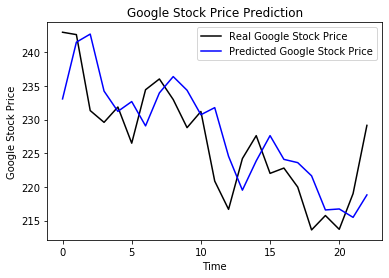

In [40]:
# Making a chart to visualize the results

plt.plot(real_stock_price, color = 'black', label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

### Compute the RMSE

In [41]:
#Importing the libraries
import math
from sklearn.metrics import mean_squared_error

In [43]:
rmse = math.sqrt( mean_squared_error( real_stock_price[0:113,:], predicted_stock_price))
rmse

5.983667024460932